In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv("vic_c_20años.csv")
df2 = pd.read_excel("2853.xlsx")
años= pd.read_csv("años.csv")

In [3]:
df=df.sort_values(by="n_victimas_mortales",ascending=False)
df.n_victimas_mortales = df.n_victimas_mortales.astype(int)

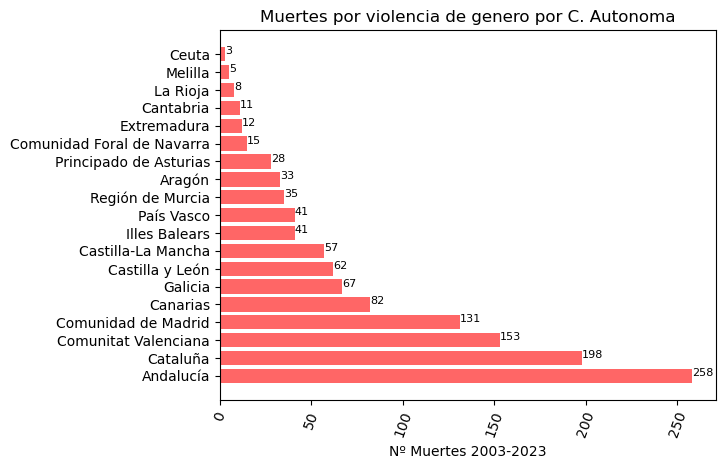

In [4]:
plt.barh(df["comunidad_autonoma"], df["n_victimas_mortales"],color="red", alpha=0.6)

for index, value in enumerate(df["n_victimas_mortales"]):
    plt.text(value, index, f'{value}', fontsize=8)

plt.xticks(rotation=70)
plt.xlabel("Nº Muertes 2003-2023")
plt.title("Muertes por violencia de genero por C. Autonoma")

plt.show()

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace= True)

In [6]:
df = df.reset_index()
df.drop(["index"], axis=1, inplace=True)
df

,comunidad_autonoma,n_victimas_mortales
0,Andalucía,258
1,Cataluña,198
2,Comunitat Valenciana,153
3,Comunidad de Madrid,131
4,Canarias,82
5,Galicia,67
6,Castilla y León,62
7,Castilla-La Mancha,57
8,Illes Balears,41
9,País Vasco,41


In [7]:
df2=df2.dropna()

In [8]:
df2=df2.drop(columns="COMUNIDAD AUTONOMA")

In [9]:
df_p=df.join(df2)

In [10]:
df_p.rename(columns={"n_victimas_mortales":"n_victimas_mortales x20 años","TOTAL MEDIA":"total_pob x20 años"}, inplace = True)

In [11]:
n_victimas = df_p["n_victimas_mortales x20 años"] / df_p["total_pob x20 años"] * 1000000

In [12]:
data = pd.DataFrame(n_victimas)

In [13]:
df_p = df_p.join(data)

In [14]:
df_p.rename(columns={0:"victimas x M habitantes"}, inplace=True)

In [15]:
df_p["victimas x M habitantes"]=df_p["victimas x M habitantes"].round(2)

In [16]:
df_p.sort_values(by="victimas x M habitantes", ascending=True, inplace=True)
df_p

,comunidad_autonoma,n_victimas_mortales x20 años,total_pob x20 años,victimas x M habitantes
14,Extremadura,12,1033135,11.62
9,País Vasco,41,2065409,19.85
15,Cantabria,11,550762,19.97
3,Comunidad de Madrid,131,6040853,21.69
13,Comunidad Foral de Navarra,15,598639,25.06
5,Galicia,67,2611586,25.65
10,Región de Murcia,35,1364234,25.66
6,Castilla y León,62,2363778,26.23
11,Aragón,33,1246472,26.47
16,La Rioja,8,298350,26.81


In [38]:
años

,año
0,2012
1,2006
2,2009
3,2023
4,2012
...,...
1235,2003
1236,2003
1237,2003
1238,2003


In [ ]:
df_p.pivot_table(index="n_victimas_mortales x20 años",
                columns="",
                values=)

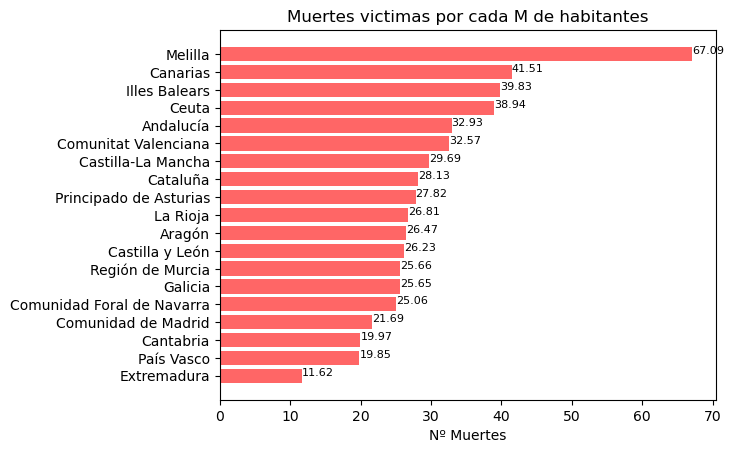

In [17]:
plt.barh(df_p["comunidad_autonoma"], df_p["victimas x M habitantes"],color="red", alpha=0.6)

for index, value in enumerate(df_p["victimas x M habitantes"]):
    plt.text(value, index, f'{value}', fontsize=8)

plt.xticks(rotation=0)
plt.xlabel("Nº Muertes")
plt.title("Muertes victimas por cada M de habitantes")

plt.show()

In [18]:
desempleo = pd.read_csv("desempleo.csv")

In [19]:
desempleo



,CCAA,tasa de desempleo %
0,País Vasco,6.3
1,Cantabria,7.5
2,Aragón,7.9
3,Cataluña,9.0
4,Galicia,9.2
5,Navarra,9.3
6,Castilla y León,9.5
7,La Rioja,9.5
8,Comunidad de Madrid,9.7
9,Región de Murcia,11.3


In [20]:
df_p = df_p.reset_index()

df_p.drop(columns="index", inplace = True)

In [21]:

df_p["comunidad_autonoma"]=df_p["comunidad_autonoma"].replace("Comunidad Foral de Navarra","Navarra")
df_p["comunidad_autonoma"]=df_p["comunidad_autonoma"].replace("Illes Balears","Islas Baleares")
df_p["comunidad_autonoma"]=df_p["comunidad_autonoma"].replace("Principado de Asturias","Asturias")
df_p["comunidad_autonoma"]=df_p["comunidad_autonoma"].replace("Comunitat Valenciana","Comunidad Valenciana")
df_p.rename(columns={"comunidad_autonoma":"CCAA"}, inplace=True)

In [22]:
df_p

,CCAA,n_victimas_mortales x20 años,total_pob x20 años,victimas x M habitantes
0,Extremadura,12,1033135,11.62
1,País Vasco,41,2065409,19.85
2,Cantabria,11,550762,19.97
3,Comunidad de Madrid,131,6040853,21.69
4,Navarra,15,598639,25.06
5,Galicia,67,2611586,25.65
6,Región de Murcia,35,1364234,25.66
7,Castilla y León,62,2363778,26.23
8,Aragón,33,1246472,26.47
9,La Rioja,8,298350,26.81


In [23]:
desempleo=desempleo.sort_values(by="CCAA").reset_index(drop=True)

In [24]:
df_p = df_p.sort_values(by='CCAA').reset_index(drop=True)

In [25]:
df_p.CCAA= df_p.CCAA.str.lower()
desempleo.CCAA=desempleo.CCAA.str.lower()

In [26]:
df_fusion = df_p.merge(desempleo, on= "CCAA", how='left')

In [27]:
df_fusion['tasa de desempleo %'] = desempleo['tasa de desempleo %']

In [28]:
type(df_fusion)

pandas.core.frame.DataFrame

In [29]:
df_fusion.sort_values(by="victimas x M habitantes", ascending=False)

,CCAA,n_victimas_mortales x20 años,total_pob x20 años,victimas x M habitantes,tasa de desempleo %
15,melilla,5,74531,67.09,27.4
3,canarias,82,1975394,41.51,16.2
13,islas baleares,41,1029493,39.83,11.4
8,ceuta,3,77044,38.94,28.4
0,andalucía,258,7833727,32.93,17.6
9,comunidad valenciana,153,4698240,32.57,12.7
6,castilla-la mancha,57,1919763,29.69,12.5
7,cataluña,198,7039924,28.13,9.0
2,asturias,28,1006324,27.82,11.8
14,la rioja,8,298350,26.81,9.5


In [30]:
df_comp=df_fusion.groupby(["CCAA","tasa de desempleo %"])["victimas x M habitantes"].sum().reset_index()

In [31]:
dgtmp=df_comp.drop(columns="tasa de desempleo %")
dgtmp.sort_values(by="victimas x M habitantes", ascending=False)

,CCAA,victimas x M habitantes
15,melilla,67.09
3,canarias,41.51
13,islas baleares,39.83
8,ceuta,38.94
0,andalucía,32.93
10,comunidad valenciana,32.57
6,castilla-la mancha,29.69
7,cataluña,28.13
2,asturias,27.82
14,la rioja,26.81


In [32]:
df_comp.sort_values(by="tasa de desempleo %", ascending=False)

,CCAA,tasa de desempleo %,victimas x M habitantes
8,ceuta,28.4,38.94
15,melilla,27.4,67.09
0,andalucía,17.6,32.93
11,extremadura,16.3,11.62
3,canarias,16.2,41.51
10,comunidad valenciana,12.7,32.57
6,castilla-la mancha,12.5,29.69
2,asturias,11.8,27.82
13,islas baleares,11.4,39.83
18,región de murcia,11.3,25.66
